<a href="https://colab.research.google.com/github/natalia2000-jpg/Machine-learning/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Εργασία 7 - SVM - Bayes

όνομα:Ναταλία Ταμβακίδου  ΑΕΜ:200


#Βιβλιοθήκες

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,BaggingRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from itertools import product
from sklearn.model_selection import GridSearchCV
import pandas as pd
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,make_scorer
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import unicodedata
from collections import Counter
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB


#Ερώτηση 1


In [62]:
df=pd.read_csv('train.csv')

In [63]:
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [64]:
print(df.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [65]:
x=df.drop(['target'],axis=1).values

In [66]:
y=df['target'].values

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0,stratify=y)

In [68]:
unique_train,counts_train=np.unique(y_train,return_counts=True)
unique_test,counts_test=np.unique(y_test,return_counts=True)

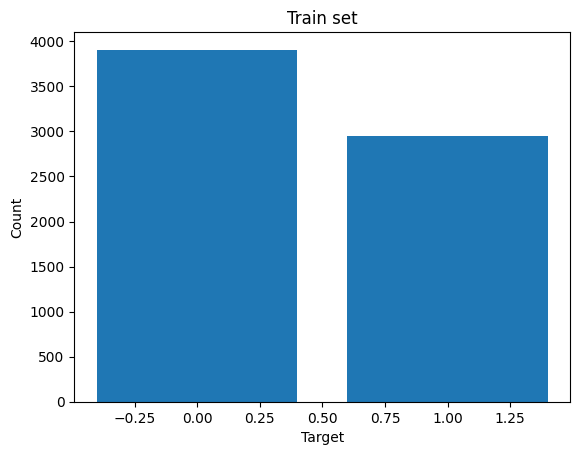

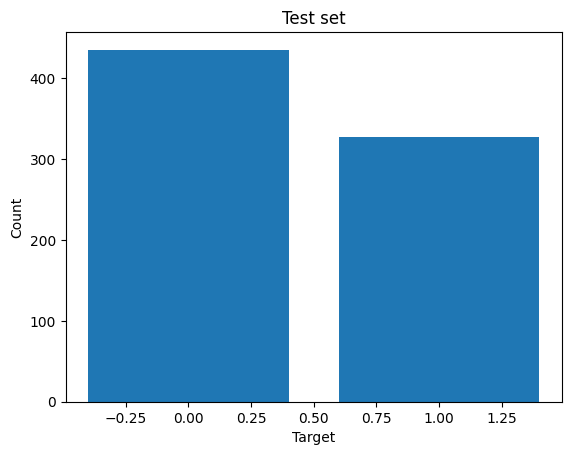

In [69]:
#Train set
plt.bar(unique_train,counts_train)
plt.title('Train set')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

#Test set
plt.bar(unique_test,counts_test)
plt.title('Test set')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

Σχόλιο: Απο τα bar-plot που κάναμε για τα train_set και test_set παρατηρούμε ότι το dataset είναι ελαφρώς ανισσόροπο,καθώς και στις δυο περιπρώσεις υπερισχύει η τιμή 0 για το target.Ωστόσο,λόγω της χρήσης της παραμέτρου statify κατά το στάδιο διαχωρισμού,train και test set, έχουμε κρατήσει την αρχική αναλογία ανάμεσα στις κλάσεις.

#Ερώτηση 2

In [70]:
columns=df.drop(['target'],axis=1).columns

In [71]:
df_train=pd.DataFrame(x_train,columns=columns)
df_train['target']=y_train

In [72]:
df_test=pd.DataFrame(x_test,columns=columns)
df_test['target']=y_test

In [73]:
#Αφαίρεση των id,location
df_train=df_train.drop(['id','location'],axis=1)
df_test=df_test.drop(['id','location'],axis=1)

In [74]:
df_train.head()


,keyword,text,target
0,threat,Meek Mill responds to DrakeÛªs OVO Fest set w...,1
1,flood,survived the plague\nfloated the flood\njust p...,0
2,weapons,#Kick Hendrixonfire @'=BLACKCATS= | BIG NOOB ...,0
3,deluge,Vince McMahon once again a billionaire: I reme...,0
4,hazardous,Is it possible to sneak into a hospital so I c...,0


In [75]:

df_test.head()

,keyword,text,target
0,bioterror,#FedEx no longer to transport bioterror germs ...,1
1,panic,Panic over: Patient in Alabama tests negative ...,1
2,dust%20storm,New Mad Max Screenshots Show Off a Lovely Dust...,0
3,evacuated,Rocky fire in Northern California swells to 60...,1
4,lava,@YoungHeroesID Lava Blast &amp; Power Red @die...,0


In [76]:
#συμπλήρωση κενών
df_train=df_train.fillna('null')
df_test=df_test.fillna('null')

In [77]:
#ένωση των keyword και text
df_train['inputs']=df_train['keyword']+' '+df_train['text']
df_test['inputs']=df_test['keyword']+' '+df_test['text']

In [78]:
df_train=df_train.drop(['keyword','text'],axis=1)
df_test=df_test.drop(['keyword','text'],axis=1)

In [79]:
target_index=df_train.columns.get_loc('target')
df_train.insert(target_index,'inputs',df_train.pop('inputs'))

In [80]:
df_train.head()

,inputs,target
0,threat Meek Mill responds to DrakeÛªs OVO Fes...,1
1,flood survived the plague\nfloated the flood\n...,0
2,weapons #Kick Hendrixonfire @'=BLACKCATS= | B...,0
3,deluge Vince McMahon once again a billionaire:...,0
4,hazardous Is it possible to sneak into a hospi...,0


In [81]:
target_index=df_test.columns.get_loc('target')
df_test.insert(target_index,'inputs',df_test.pop('inputs'))

In [82]:
df_test.head()

,inputs,target
0,bioterror #FedEx no longer to transport bioter...,1
1,panic Panic over: Patient in Alabama tests neg...,1
2,dust%20storm New Mad Max Screenshots Show Off ...,0
3,evacuated Rocky fire in Northern California sw...,1
4,lava @YoungHeroesID Lava Blast &amp; Power Red...,0


#Ερώτηση 3


In [83]:
#εύρεση κατηγοριών θορύβου για το train_set
text_all_train=''.join(df_train['inputs'].astype(str))

In [84]:
char_categories=[]
for i in text_all_train:
  j=unicodedata.category(i)
  char_categories.append(j)
category_counts_train=Counter(char_categories)
category_counts_train

Counter({'Ll': 522283,
         'Zs': 102234,
         'Lu': 67967,
         'Cc': 1616,
         'Lo': 172,
         'Po': 44234,
         'Sm': 332,
         'Nd': 16110,
         'Sc': 60,
         'Pc': 770,
         'Pd': 1588,
         'Ps': 429,
         'Pe': 449,
         'Sk': 15,
         'No': 5,
         'So': 9,
         'Pi': 2})

In [85]:
def clean_text(text):
  text=str(text)
  text=text.lower()
  text=re.sub(r'[^\x00-\x7F]+', ' ', text)
  text = re.sub(r'\d+', ' ', text)
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = re.sub(r'\s+', ' ', text).strip()
  return text

In [86]:
df_train['inputs_clean']=df_train['inputs'].apply(clean_text)

In [87]:
#εύρεση κατηγοριών θορύβου για το test set
text_all_test=''.join(df_test['inputs'].astype(str))

In [88]:
char_categories_test=[]
for i in text_all_test:
  j=unicodedata.category(i)
  char_categories_test.append(j)
category_counts_test=Counter(char_categories_test)
category_counts_test

Counter({'Ll': 58286,
         'Zs': 11420,
         'Po': 5052,
         'Lu': 7578,
         'Nd': 1819,
         'Cc': 171,
         'Pc': 93,
         'Sm': 41,
         'Ps': 55,
         'Pe': 59,
         'Pd': 165,
         'Lo': 19,
         'Sc': 3,
         'Sk': 1,
         'So': 1})

In [89]:
df_test['inputs_clean']=df_test['inputs'].apply(clean_text)

In [90]:
df_train[['inputs', 'inputs_clean']].head(5)


,inputs,inputs_clean
0,threat Meek Mill responds to DrakeÛªs OVO Fes...,threat meek mill responds to drake s ovo fest ...
1,flood survived the plague\nfloated the flood\n...,flood survived the plague floated the flood ju...
2,weapons #Kick Hendrixonfire @'=BLACKCATS= | B...,weapons kick hendrixonfire blackcats big noob ...
3,deluge Vince McMahon once again a billionaire:...,deluge vince mcmahon once again a billionaire ...
4,hazardous Is it possible to sneak into a hospi...,hazardous is it possible to sneak into a hospi...


In [91]:
df_test[['inputs', 'inputs_clean']].head(5)


,inputs,inputs_clean
0,bioterror #FedEx no longer to transport bioter...,bioterror fedex no longer to transport bioterr...
1,panic Panic over: Patient in Alabama tests neg...,panic panic over patient in alabama tests nega...
2,dust%20storm New Mad Max Screenshots Show Off ...,dust storm new mad max screenshots show off a ...
3,evacuated Rocky fire in Northern California sw...,evacuated rocky fire in northern california sw...
4,lava @YoungHeroesID Lava Blast &amp; Power Red...,lava youngheroesid lava blast amp power red di...


In [92]:
df_train=df_train.drop(['inputs'],axis=1)
df_test=df_test.drop(['inputs'],axis=1)

In [93]:
target_index=df_train.columns.get_loc('target')
df_train.insert(target_index,'inputs_clean',df_train.pop('inputs_clean'))

In [94]:
target_index=df_test.columns.get_loc('target')
df_test.insert(target_index,'inputs_clean',df_test.pop('inputs_clean'))

In [95]:
df_train.head()

,inputs_clean,target
0,threat meek mill responds to drake s ovo fest ...,1
1,flood survived the plague floated the flood ju...,0
2,weapons kick hendrixonfire blackcats big noob ...,0
3,deluge vince mcmahon once again a billionaire ...,0
4,hazardous is it possible to sneak into a hospi...,0


In [96]:
df_test.head()

,inputs_clean,target
0,bioterror fedex no longer to transport bioterr...,1
1,panic panic over patient in alabama tests nega...,1
2,dust storm new mad max screenshots show off a ...,0
3,evacuated rocky fire in northern california sw...,1
4,lava youngheroesid lava blast amp power red di...,0


Σχόλιο:Η επιλογή των συναρτήσεων που χρησιμοποιήθηκαν για την αφαίρεση θορύβου και περιττών πληροφριών βασίστηκε στην ανάλυση  των Unicode κατηγοριών των χαρακτήρων των tweets,από την οποία διαπιστώθηκε η παρουσία σημείων στίξης,αριθμών,unicode χαρακτήρων και κεφαλαίων γραμμάτων.Τεχνικές που χρησιμοποιήθηκαν είναι:

*   Remove Unicode strings and noise:Αφαίρεση μη ASCII χαρακτληρες,control characters και σύμβολα (όπως emoji), τα οποία δεν συνεισφέρουν στη σημασιλογική ανάλυση του κειμένου.
*  Lowercasing:Μετατροπή ολων των γραμμάτων σε πεζά,ώστε να αποφευχθεί η διάκριση μεταξύ δύο ίδιων λέξεων λόγω  διαφορετικής μορφής.
* Remove punctuation:Αφαίρεση σημείων στίξης και ειδικούς χαρακτήρες.
* Remove numbers: Διαγραφή αριθμών που εμφανίζονται στο κείμενο,χωρίσ να επηρεαστεί η σημασία του tweet.
* Whitespace normalization: Αντικατάσταση πολλαπλών κενών με ένα, με σκοπό την ύπαρξει ομοιόμορφης μορφής στο κείμενο.



#Ερώτηση 4

In [97]:
inputs_train=df_train['inputs_clean'].values
inputs_test=df_test['inputs_clean'].values

target_train=df_train['target'].values
target_test=df_test['target'].values

In [98]:
tfidf=TfidfVectorizer()
x_train_tfidf=tfidf.fit_transform(inputs_train)
x_test_tfidf=tfidf.transform(inputs_test)

In [99]:
print(x_train_tfidf.shape)
print(x_test_tfidf.shape)

(6851, 21607)
(762, 21607)


Σχόλιο: Εφαρμόζουμε fit_transform στο inputs_train,ώστε ο TfidfVectorizer να μάθει ποιες λέξεις υπάρχουν (λεξιλόγιο) και να υπολογίσει το TF-IDF για κάθε λέξη σε κάθε tweet.Ενώ εφαρμόζουμε transform στο inputs_test για να χηρσιμοποιήσεi το ήδη υπάρχον λεξιλόγιο απο το train set  και να υπολογίζει τα TF-IDf μόνο για τις λέξεις που εμφανίζονται και στα δυο set,εξασφαλίζοντας συνέπεια στα χαρακτηριστικά και αποφεύγοντας τη διαρροή πληροφορίας.

#Ερώτημα 6


In [100]:
model=LinearSVC(random_state=0)
model.fit(x_train_tfidf,target_train)

LinearSVC(random_state=0)

In [101]:
y_train_pred=model.predict(x_train_tfidf)
y_test_pred=model.predict(x_test_tfidf)

In [102]:
metrics = {
    "Accuracy": [accuracy_score(target_train, y_train_pred), accuracy_score(target_test, y_test_pred)],
    "F1-score": [f1_score(target_train, y_train_pred), f1_score(target_test, y_test_pred)],
    "Precision": [precision_score(target_train, y_train_pred), precision_score(target_test, y_test_pred)],
    "Recall": [recall_score(target_train, y_train_pred), recall_score(target_test, y_test_pred)]
}


In [103]:
df_metrics=pd.DataFrame(metrics,index=['Train','Test'])
df_metrics

,Accuracy,F1-score,Precision,Recall
Train,0.981900,0.978701,0.989924,0.967731
Test,0.808399,0.770440,0.792880,0.749235


Σχόλιο: Στην περίπτωση αυτή,όπου θέλουμε να φτιάξουμε ένα μοντέλο πρόβλεψης για φυσικές καταστροφές και μέσο του οποίου θα παίρνετε η απόφαση αν χρειάζεται να εκκενωθεί μια περιοχή, μας ενδιαφέρει ο ταξινομητής μασ να εντοπίζει όσο το δυνατόν περισσότερα θετικές πειτπτώσεις, ακόμα και αν δεν είναι πολύ σίγουρος.Συνεπώς η πιο κατάλληλη  μετρική για αυτόν τον σκοπό είναι η Recall,καθώς μετράει το ποσοστό των θετικών παραδειγμάτων που βρήκε ο ταξινομητής.

#Ερώτηση 7

In [104]:
x_train_den=x_train_tfidf.toarray()
x_test_den=x_test_tfidf.toarray()

In [105]:
pca=PCA(n_components=0.95,random_state=0)
x_train_pca=pca.fit_transform(x_train_den)
x_test_pca=pca.transform(x_test_den)

In [106]:
pca.n_components_

np.int64(4810)

In [107]:
#LinearSVC
linears_svc=LinearSVC(random_state=0)
linears_svc.fit(x_train_pca,target_train)
y_train_pred_linear=linears_svc.predict(x_train_pca)
y_test_pred_linear=linears_svc.predict(x_test_pca)

In [108]:
#SVC με RBF kernel
rbf_svc=SVC(kernel='rbf',random_state=0)
rbf_svc.fit(x_train_pca,target_train)
y_train_pred_rbf=rbf_svc.predict(x_train_pca)
y_test_pred_rbf=rbf_svc.predict(x_test_pca)


In [109]:
metrics = {
"Accuracy": [accuracy_score(target_test, y_test_pred_linear), accuracy_score(target_test, y_test_pred_rbf)],
"F1-score": [f1_score(target_test, y_test_pred_linear), f1_score(target_test, y_test_pred_rbf)],
"Precision": [precision_score(target_test, y_test_pred_linear), precision_score(target_test, y_test_pred_rbf)],
"Recall": [recall_score(target_test, y_test_pred_linear), recall_score(target_test, y_test_pred_rbf)]
}


In [110]:
df_metrics=pd.DataFrame(metrics,index=['LinearSVC','SVC_RBF'])
df_metrics

,Accuracy,F1-score,Precision,Recall
LinearSVC,0.809711,0.771654,0.795455,0.749235
SVC_RBF,0.813648,0.773163,0.809365,0.740061


#Ερώτηση 8


Σχόλιο:Η παράμετρος gamma του RBF kernel ορίζει την εππιροή ενός δείγματος στο decision boundary.Η default ειλογή gamma='scale' υπολογίζεται ως 1/(n_features*Var(x)), ενώ η επιλογή gamma='auto;  ως 1/n_features.

In [111]:
rbf_svc_auto=SVC(kernel='rbf',gamma='auto',random_state=0)
rbf_svc_auto.fit(x_train_pca,target_train)
y_train_pred_rbf_auto=rbf_svc_auto.predict(x_train_pca)
y_test_pred_rbf_auto=rbf_svc_auto.predict(x_test_pca)

In [112]:
np.unique(y_test_pred_rbf_auto, return_counts=True)


(array([0]), array([762]))

In [113]:
df_metrics_all = pd.DataFrame({
    "Accuracy": [
        accuracy_score(target_test, y_test_pred_linear),
        accuracy_score(target_test, y_test_pred_rbf),
        accuracy_score(target_test, y_test_pred_rbf_auto)
    ],
    "F1-score": [
        f1_score(target_test, y_test_pred_linear),
        f1_score(target_test, y_test_pred_rbf),
        f1_score(target_test, y_test_pred_rbf_auto)
    ],
    "Precision": [
        precision_score(target_test, y_test_pred_linear),
        precision_score(target_test, y_test_pred_rbf),
        precision_score(target_test, y_test_pred_rbf_auto,zero_division=0)
    ],
    "Recall": [
        recall_score(target_test, y_test_pred_linear),
        recall_score(target_test, y_test_pred_rbf),
        recall_score(target_test, y_test_pred_rbf_auto)
    ]
}, index=["LinearSVC","SVC_RBF_scale","SVC_RBF_auto"])

df_metrics_all

,Accuracy,F1-score,Precision,Recall
LinearSVC,0.809711,0.771654,0.795455,0.749235
SVC_RBF_scale,0.813648,0.773163,0.809365,0.740061
SVC_RBF_auto,0.570866,0.000000,0.000000,0.000000


Σχόλιο:Στο ερώτημα 7 κάναμε χρήση του PCA στα train_set και test_set με n_componets=0.95,γεγονός που οδήγησε στην διατήρηση Χ=4810 κύριων συνιστώσεων οι οποίες εξηγούν ουλάχιστον το 95% της συνολικής διακύμανης των δεδομένων.Ως αποτέλεσμα, όταν βάζουμε την παράμετρα gamma='auto' να παίρνει την τιμή 1/4810.Η τιμή αυτή οδηγεί σε ένα υπερβολικά ομαλό(σχεδόν γραμμικού) decision boundary, με αποτέλεσμα το μοντέλο να ταξινομεί όλα τα δείγματα στην αρντική κλάση(target=0).Συνεπώς, δεν εντοπίζονται θετικά παραδείγματα (TP=0) γεγονός που οδηγεί σε μηδενικές τιμές Precision και Recall.

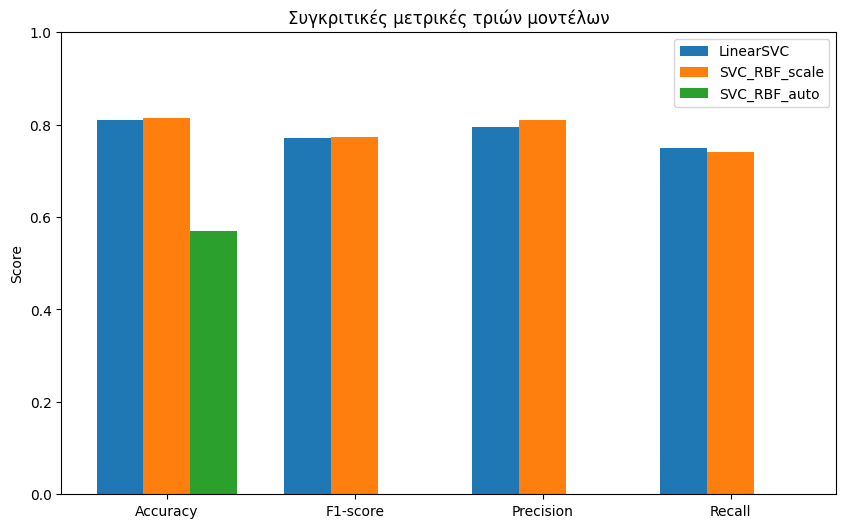

In [114]:
metrics_names=df_metrics_all.columns
models_names=df_metrics_all.index
x=np.arange(len(metrics_names))
width=0.25
ig, ax = plt.subplots(figsize=(10,6))

ax.bar(x - width, df_metrics_all.iloc[0], width, label='LinearSVC')
ax.bar(x, df_metrics_all.iloc[1], width, label='SVC_RBF_scale')
ax.bar(x + width, df_metrics_all.iloc[2], width, label='SVC_RBF_auto')

ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.set_ylim(0, 1)
ax.set_ylabel("Score")
ax.set_title("Συγκριτικές μετρικές τριών μοντέλων")
ax.legend()
plt.show()

Σχόλιο: Παρά την χρήση κι άλλων μοντέλων την καλύτερη απόδοση με βάση την μετρική Recall, την επιτυγχάνει το LinearSVC

Σχόλιο: Προκειμένου να λύσουμε το πρόβλημα,όπου το μοντέλο δεν προβλέπει καθόλου την κλάση 1, θα αυξήσουμε την παράμετρο C έτσι ώστε να μειψθεί η ανοχή στα λάθη ταξινόμησης και να αναγκαστεί το μοντέλο να δημιουργήσει πιο πολύπλοκα decision boundaries κάνοντας καμπύλεσ για να πιάσει όλα τα θετικά.

In [115]:
rbf_svc_auto=SVC(kernel='rbf',gamma='auto',class_weight='balanced',C=100,random_state=0)
rbf_svc_auto.fit(x_train_pca,target_train)
y_train_pred_rbf_auto=rbf_svc_auto.predict(x_train_pca)
y_test_pred_rbf_auto=rbf_svc_auto.predict(x_test_pca)

In [116]:
df_metrics_all = pd.DataFrame({
    "Accuracy": [
        accuracy_score(target_test, y_test_pred_linear),
        accuracy_score(target_test, y_test_pred_rbf),
        accuracy_score(target_test, y_test_pred_rbf_auto)
    ],
    "F1-score": [
        f1_score(target_test, y_test_pred_linear),
        f1_score(target_test, y_test_pred_rbf),
        f1_score(target_test, y_test_pred_rbf_auto)
    ],
    "Precision": [
        precision_score(target_test, y_test_pred_linear),
        precision_score(target_test, y_test_pred_rbf),
        precision_score(target_test, y_test_pred_rbf_auto,zero_division=0)
    ],
    "Recall": [
        recall_score(target_test, y_test_pred_linear),
        recall_score(target_test, y_test_pred_rbf),
        recall_score(target_test, y_test_pred_rbf_auto)
    ]
}, index=["LinearSVC","SVC_RBF_scale","SVC_RBF_auto"])

df_metrics_all

,Accuracy,F1-score,Precision,Recall
LinearSVC,0.809711,0.771654,0.795455,0.749235
SVC_RBF_scale,0.813648,0.773163,0.809365,0.740061
SVC_RBF_auto,0.788714,0.735632,0.794326,0.685015


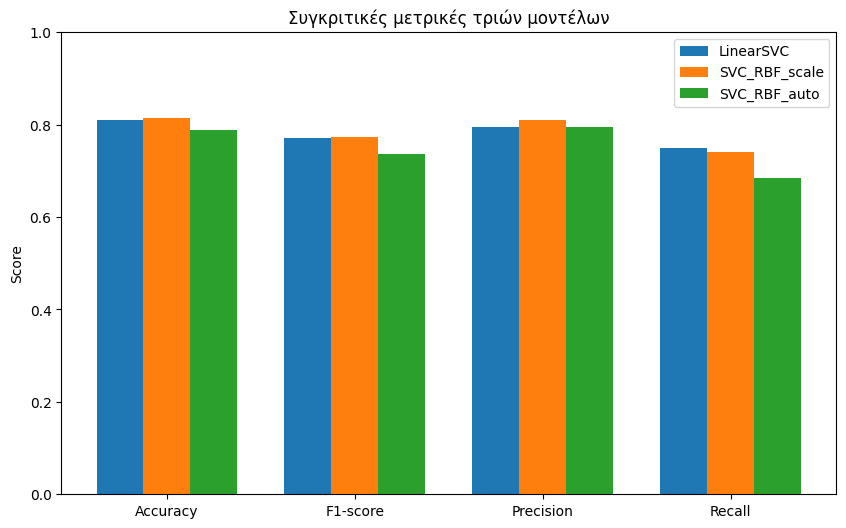

In [117]:
metrics_names=df_metrics_all.columns
models_names=df_metrics_all.index
x=np.arange(len(metrics_names))
width=0.25
ig, ax = plt.subplots(figsize=(10,6))

ax.bar(x - width, df_metrics_all.iloc[0], width, label='LinearSVC')
ax.bar(x, df_metrics_all.iloc[1], width, label='SVC_RBF_scale')
ax.bar(x + width, df_metrics_all.iloc[2], width, label='SVC_RBF_auto')

ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.set_ylim(0, 1)
ax.set_ylabel("Score")
ax.set_title("Συγκριτικές μετρικές τριών μοντέλων")
ax.legend()
plt.show()

#Ερώτημα 9

In [118]:
gnb=GaussianNB()

In [119]:
gnb.fit(x_train_den,target_train)
y_train_pred_gnb=gnb.predict(x_train_den)
y_test_pred_gnb=gnb.predict(x_test_den)

In [120]:
metrics_gnb = {
    "Accuracy": [accuracy_score(target_train, y_train_pred_gnb), accuracy_score(target_test, y_test_pred_gnb)],
    "F1-score": [f1_score(target_train, y_train_pred_gnb), f1_score(target_test, y_test_pred_gnb)],
    "Precision": [precision_score(target_train, y_train_pred_gnb), precision_score(target_test, y_test_pred_gnb)],
    "Recall": [recall_score(target_train, y_train_pred_gnb), recall_score(target_test, y_test_pred_gnb)]
}


In [121]:
df_metrics_gnb=pd.DataFrame(metrics_gnb,index=['Train','Test'])
df_metrics_gnb

,Accuracy,F1-score,Precision,Recall
Train,0.954313,0.949524,0.903899,1.000000
Test,0.627297,0.646766,0.545073,0.795107
